In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection
import warnings.Warning as warning

class Poly:
    
    def __init__(self, v):
        #v - set of vertices, assumed to be in clockwise order
        self.v = v
        self.n = len(v)
        self.XSI = self._build_XSI()
        self.reflex_ids = self._find_reflex_angles()
        
    def convex_skull(self):
        #let's just handle the case of the single reflex corner for now
        if len(self.reflex_ids == 0):
            return self
        if len(self.reflex_ids) == 1:
            u_id = self.reflex_ids[0]
            u = self.v[u_id]
            #Find possible chords through u
            #find all extremal chords through u
            for i in range(self.n):
                ex_U_chords = []
                if i != u_id:
                    #see if we can make a valid chord here
                    
                    
    def build_extremal_chord(self, id1, id2):
        line = SL_from_tip([self.v[id1], self.v[id2]])
        #extend the segment beyond U so that it's bound to have passed beyond the poly
        # in the id1 -> id2 direction
        p1 = self.v[id1]
        p2 = self.v[id2]
        if p1[0] - p2[0] > 0:
            #moving to the left, find the smallest
            x = np.min(self.v[:,0]) - 1
            y = line.y_at(x)
        elif p1[0] - p2[0] < 0:
            #moving right
            x = np.max(self.v[:,0]) + 1
            y = line.y_at(x)
        else:
            #its a vertical line, just make y very large
            x = 
            if p[1] < p[2]:
                y = np.max(self.v[:,1]) + 1
            elif p[1] > p[2]:
                y = np.min(self.v[:,1]) - 1
            else:
                y = np.nan
                warning('Tried to create line segment from identical points')
        
        
            
    def plot_poly(self):
        pgn = Polygon(self.v)
        pc = PatchCollection([pgn])
        # Create figure and axes
        fig, ax = plt.subplots(1)
        ax.add_collection(pc)
        ax.set_xlim(np.min(self.v[:,0]) -1 , np.max(self.v[:,0]) +1 )
        ax.set_ylim(np.min(self.v[:,1]) -1 , np.max(self.v[:,1]) +1 )
        
    def plot_XSI(self):
        for i in range(self.n):
            for j in range(i+1, self.n):
                if self.XSI[i,j]:
                    idx = [i,j]
                    plt.plot(self.v[idx,0], self.v[idx,1])
        
    def poly_is_convex(self):
        return len(self.reflex_ids) == 0
        
    def _find_reflex_angles(self):
        #for each triplet of vertices, see if they form an angle that contradicts
        #the point order (e.g., if it's counterlockwise when order is clockwise)
        reflex_idx = []
        for i in range(self.n):
            a = vertices[i]
            b = vertices[(i+1)%n]
            c = vertices[(i+2)%n]
            ccw = is_ccw(a,b,c)
            #vertices given in CW order, but these appear to be CCW -> reflex
            if ccw:
                reflex_idx.append((i+1)%n)

        return reflex_idx
    
    def _build_XSI(self):
        #paper says this can be done in O(n^2logn) time, but I'm not sure
        #what that algorithm would look like
        
        XSI = np.ones((self.n,self.n))
        #check all cords to see which intersect
        for i in range(self.n):
            #since i+1 is just an edge, which we know is OK
            for j in range(i+2, self.n):
                for l in range(self.n):
                    k = (l+1)%self.n
                    if (i!=l and i!=k and j!=l and j!=k 
                        and segments_intersect(self.v[i], self.v[j], self.v[l], self.v[k]) ):
                        XSI[i,j] = 0
                        XSI[j,i] = 0
                        XSI[l,k] = 0
                        XSI[k,l] = 0

        #now check to make sure the chord candidates which don't intersect other candidates
        # is inside the polygon
        for i in range(self.n):
            #since i+1 is just an edge, which we know is OK
            for j in range(i+2, self.n):
                if XSI[i,j]:
                    mid_point = (self.v[i] + self.v[j])/2
                    if not point_in_poly(self.v, mid_point):
                        XSI[i,j] = 0
                        XSI[j,i] = 0
                        
        return XSI
    
    
        def point_in_poly(self, pt):
            n_inter = 0

            end_pt = np.max(vertices,axis=0)+1#just put another point way out there

            #check how many edges we intersect
            for i in range(self.n):
                a1 = self.v[i]
                b1 = self.v[(i+1)%self.n]
                n_inter += segments_intersect(a1, b1, pt, end_pt)

            #odd number of intersections indicates point was in interior
            return n_inter%2 == 1

            ########################
            # A few static functions
            ########################
            def is_cyclic(a_ids, b_ids, n):
                #Must be cyclic in Clockwise direction? Unclear from paper.
                #For now, assume that's the case
                #Reset indices so that i is at 0
                i,j = (a_ids - a_ids[0])%n
                k,l = (b_ids - a_ids[0])%n
                #it's ok for l to be at 0
                if l==0:
                    l = n
                return  (k>=j and l>k)

    
##########################
#GEOMETRIC UTILITY FUNCTIONS
##########################
def is_ccw(a,b,c):
    return (b[0] - a[0])*(c[1] - b[1]) - (c[0] - b[0])*(b[1] - a[1]) > 0

def segments_intersect(a1, b1, a2, b2):
    return is_ccw(a1, b1, a2) != is_ccw(a1, b1, b2) and is_ccw(a2, b2, a1) != is_ccw(a2, b2, b1)




IndentationError: expected an indented block (<ipython-input-2-31484d07875f>, line 19)

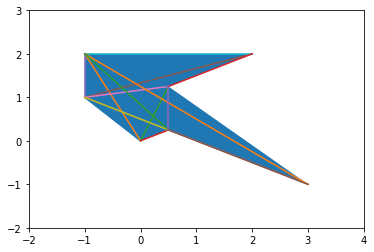

In [17]:
vertices = np.array([[0,0],[-1,1], [-1,2], [2, 2], [0.5, 1.25], [3, -1], [0.5, 0.25]])
pp = PotatoPeeler(vertices)
pp.plot_poly()
pp.plot_XSI()

In [22]:
class SupportingLine:
    
    def __init__(self, dy, dx, b, pt):
        self.dy = dy
        self.dx = dx
        self.is_vertical = False
        if dx == 0:
            self.is_vertical = True
        self.b = b
        # a reference point in case dy is 0
        self.ref = pt
        
    def y_at(self,x):
        if self.is_vertical:
            return np.nan
        else:
            return self.b + (self.dy/self.dx)*x
    def x_at(self, y):
        if dy == 0:
            return np.nan
        elif dx == 0 :
            return self.ref[0]
        else:
            return (y-self.b)/(self.dy/self.dx)
        
        
    def intersection(self, other):
        if self.is_parallel(other):
            return np.nan, np.nan
        if self.is_vertical:
            x = self.ref[0]
            y = other.y_at(x)
            return x,y
        else:
            x = (other.b - self.b)/((self.dy/self.dx) - (other.dy/other.dx))
            y = self.y_at(x)
            return x,y
    
    def is_parallel(self, other):
        if self.is_vertical:
            return other.is_vertical
        else:
            return (self.dy/self.dx == other.dy/other.dx)
        
def SL_from_tip(tip):
    m = tip[1] - tip[0]
    b = -m@tip[1]
    return SupportingLine(m[1], m[0],b, tip[0])

class Butterfly:
    
    def __init__(self, tip1, tip2, u, pvs):
        self.tip1 = tip1
        self.tip2 = tip2
        self.L0 = SL_from_tip(self.tip1)
        self.L1 = SL_from_tip(self.tip2)
        self.u = u
        self.t = self._calc_type()
        self.pvs = pvs
        
    def _calc_type(self):
        x,y = self.L0.intersection(self.L1)
        if x is None:
            return 'V'
        else:
            return self.in_cplus([x,y])
        
    def in_cplus(self, pt):
        #move just a hair away from u towards pt and see if we're in the polygon
        line = SL_from_tip([self.u, pt])
        eps = 1e-8
        x = self.u[0]+np.sign(pt[0] - self.u[0])*eps
        y = line.y_at(x)
        if not np.isnan(y):
            return point_in_poly(self.pvs, [x,y])
        
    def plot(self):
        pts = np.array(tip1[0], tip1[1], u, tip2[1], tip2[0], tip1[0])
        plt.plot(pts[:,0], pts[:,1])
            